# Title: Multichannel Adjustable Single-Photon Router Based on Large Detuning——PRAPPLIED 18,054007

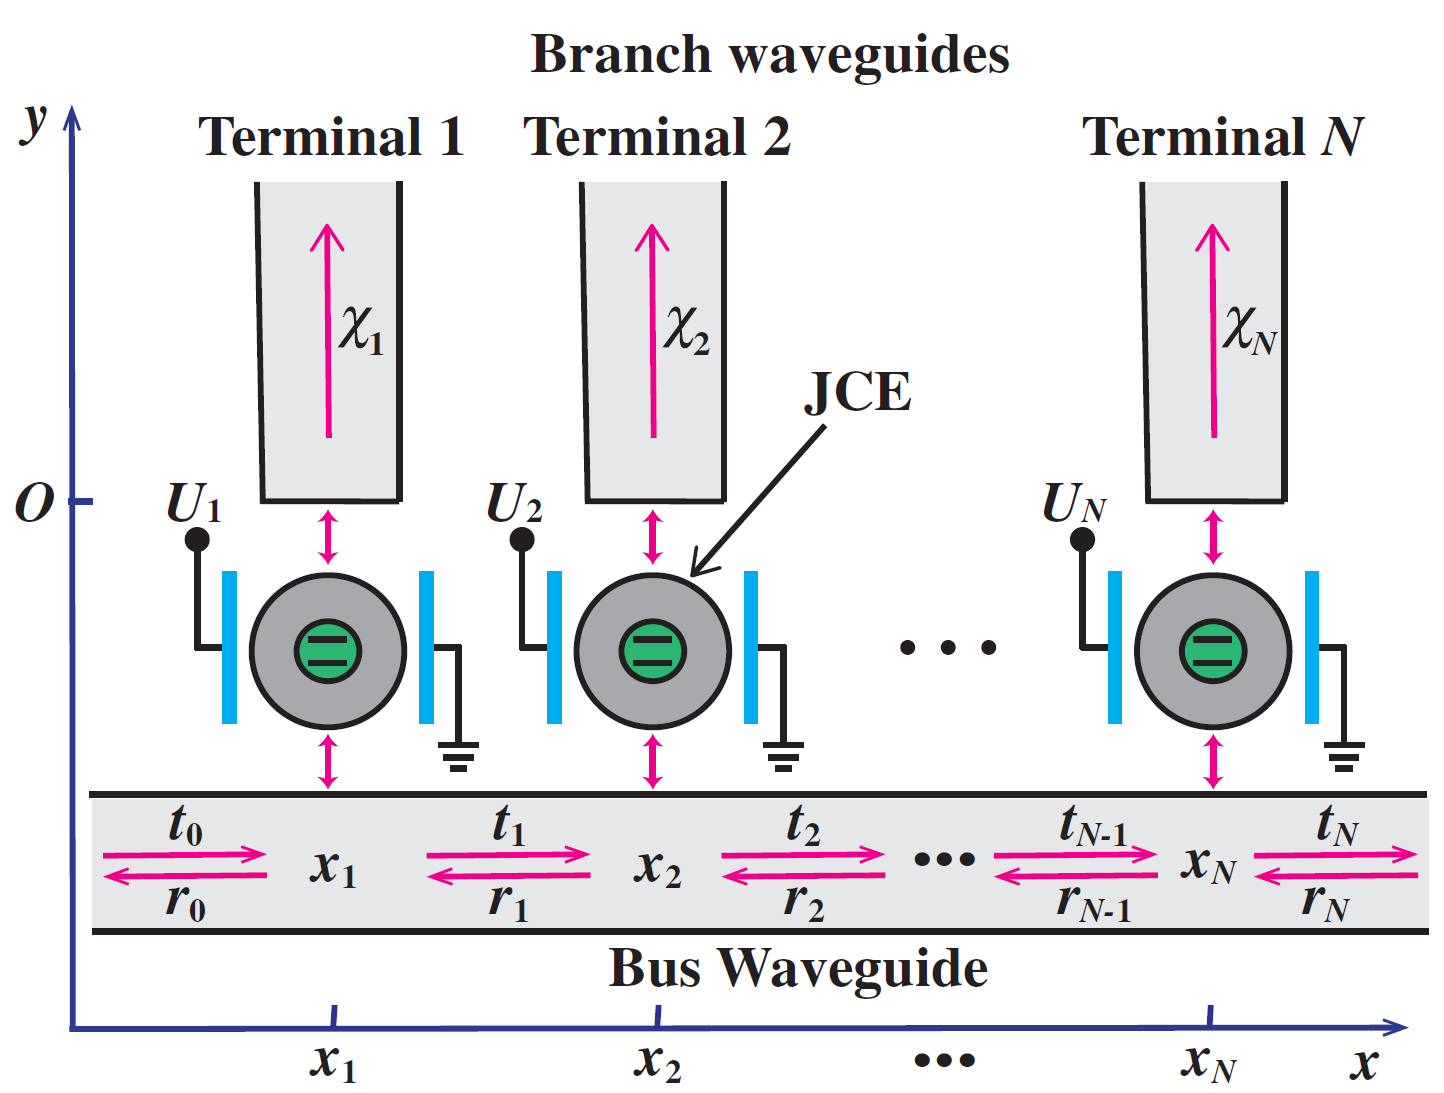

## The effective Hamiltonian

$$H_{\text{eff}}=H_{\text{JCE}}+H_{\text{wg}}^\prime$$
where
\begin{align*}
H_{\text{JCE}}&=\sum_{n=1}^{N}\left[\left(\omega_n^c-i\gamma_n^c\right)c_n^\dagger c_n+\left(\omega_n^a-i\gamma_n^a\right)\sigma_n^\dagger \sigma_n+\Omega\left(c_n^\dagger\sigma_n+c_n\sigma_n^\dagger\right) \right]\\
H_{\text{wg}}^\prime&=-i\Gamma\sum_{j,k=1}^{N}e^{ik_0|x_j-x_k|}c_j^\dagger c_k-i\Gamma/2\sum_{n=1}^{N}c_n^\dagger c_n.
\end{align*}
Here, $\Gamma=V_0^2/v_g$, $k_0=2\pi$, and $\lambda_0=1$.

## The Input-Output formalism of Bus waveguide modes
\begin{align*}
b_{r,\text{out}}&=b_{r,\text{in}}-i\sum_{k=1}^{N}\exp(-ik_0x_k)\sqrt{\Gamma_{k,r}}\sigma_k,\\
b_{l,\text{out}}&=b_{l,\text{in}}-i\sum_{k=1}^{N}\exp(+ik_0x_k)\sqrt{\Gamma_{k,l}}\sigma_k,
\end{align*}
where $\Gamma_{k,\mu}=\Gamma, \forall \mu\in\{l,r\}$.

## The Input-Output formalism of Branch waveguide modes
$$
d^{(n)}_{\text{out}}=d^{(n)}_{\text{in}}-i\sqrt{\Gamma}c_n
$$

### Figure 2
$$\Omega=0,\gamma_n^c=0, d=1.25,\Gamma=0.001\omega_0$$

#### Figure 2.(a)
$$\omega_n^c=[0.94+0.06(n-1)]\omega_0\ (n=1,2,3)$$

In [1]:
from qcs_phy import qcs

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# system parameters
N = 3
ω0 = 1

γn_c = 0
Γ = 0.001*ω0
d = 1.25 * 2 * np.pi


ϵ = np.linspace(0.9, 1.1, 10000)

locs = list(range(N))
ωn_c = [0.94+0.06*(n-1) for n in range(1, N+1)]

In [23]:
# construct Input and Output channels
mode_br = [[np.sqrt(Γ)*np.exp(-1j*locs[k]*d), ("a", k)] for k in range(N)]
mode_cN = [[np.sqrt(Γ), ("a", k)] for k in range(N)]


Input = qcs.Input_channel("br", mode_br, ϵ)
Output = [qcs.Output_channel("c_%s"%k, mode_cN[k]) for k in range(N)]
# construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
Heff = []
for k in range(N):
    Heff.append([ωn_c[k]-1j*Γ/2-1j*γn_c, ("ad", k), ("a", k)])
    for l in range(N):
        Heff.append([-1j*Γ*np.exp(1j*d*np.abs(locs[k]-locs[l])), ("ad", k), ("a", l)])
        
result = qcs(Heff, Input, Output)

Sn = [result.calculate_quantity("c_%s"%k) for k in range(N)]

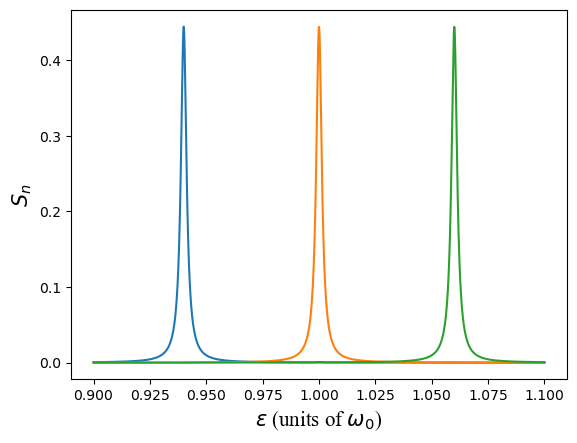

In [24]:
for k in range(N):
    plt.plot(ϵ, Sn[k])
plt.xlabel(r"$\varepsilon$ (units of $\omega_0$)", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$S_n$", fontdict={"family": "Times New Roman", "size": 15})
plt.show()

#### Figure 2.(b)
$$\omega_n^c=[0.93+0.03(n-1)]\omega_0\ (n=1,2,\ldots,6)$$

In [25]:
# system parameters
N = 6
ω0 = 1

γn_c = 0
Γ = 0.001*ω0
d = 1.25 * 2 * np.pi


ϵ = np.linspace(0.9, 1.1, 10000)

locs = list(range(N))
ωn_c = [0.93+0.03*(n-1) for n in range(1, N+1)]

In [26]:
# construct Input and Output channels
mode_br = [[np.sqrt(Γ)*np.exp(-1j*locs[k]*d), ("a", k)] for k in range(N)]
mode_cN = [[np.sqrt(Γ), ("a", k)] for k in range(N)]


Input = qcs.Input_channel("br", mode_br, ϵ)
Output = [qcs.Output_channel("c_%s"%k, mode_cN[k]) for k in range(N)]
# construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
Heff = []
for k in range(N):
    Heff.append([ωn_c[k]-1j*Γ/2-1j*γn_c, ("ad", k), ("a", k)])
    for l in range(N):
        Heff.append([-1j*Γ*np.exp(1j*d*np.abs(locs[k]-locs[l])), ("ad", k), ("a", l)])
        
result = qcs(Heff, Input, Output)

Sn = [result.calculate_quantity("c_%s"%k) for k in range(N)]

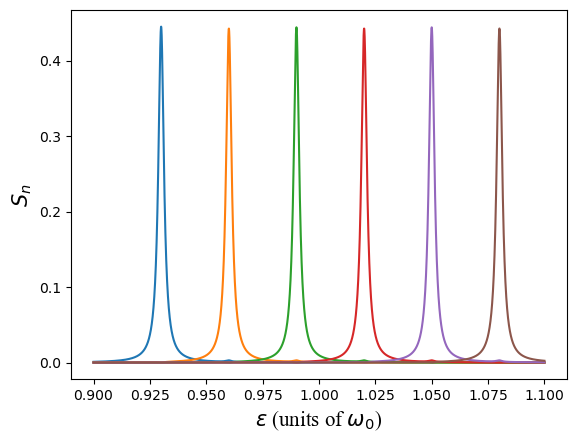

In [27]:
for k in range(N):
    plt.plot(ϵ, Sn[k])
plt.xlabel(r"$\varepsilon$ (units of $\omega_0$)", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$S_n$", fontdict={"family": "Times New Roman", "size": 15})
plt.show()

### Figure 3
$$\Omega=0.05\omega_0,\gamma_n^c=\gamma_n^a=0, d=1.25,\Gamma=0.001\omega_0,N=8$$

#### Figure 3.(a)
$$\omega_n^c=\omega_n^a=[0.96+0.01(n-1)]\omega_0\ (n=1,2,\ldots,N)$$

In [30]:
# system parameters
N = 8
ω0 = 1

γn_c = 0
γn_a = 0
Ω=0.05*ω0
Γ = 0.001*ω0
d = 1.25 * 2 * np.pi


ϵ = np.linspace(0.9, 1.1, 10000)

locs = list(range(N))
ωn_c = [0.96+0.01*(n-1) for n in range(1, N+1)]
ωn_a = ωn_c

In [31]:
# construct Input and Output channels
mode_br = [[np.sqrt(Γ)*np.exp(-1j*locs[k]*d), ("a", k)] for k in range(N)]
mode_cN = [[np.sqrt(Γ), ("a", k)] for k in range(N)]


Input = qcs.Input_channel("br", mode_br, ϵ)
Output = [qcs.Output_channel("c_%s"%k, mode_cN[k]) for k in range(N)]
# construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
Heff = []
for k in range(N):
    Heff.append([ωn_c[k]-1j*Γ/2-1j*γn_c, ("ad", k), ("a", k)])
    Heff.append([ωn_a[k]-1j*γn_a, ("sp", k), ("sm", k)])
    Heff.append([Ω, ("ad", k), ("sm", k)])
    Heff.append([Ω, ("a", k), ("sp", k)])
    for l in range(N):
        Heff.append([-1j*Γ*np.exp(1j*d*np.abs(locs[k]-locs[l])), ("ad", k), ("a", l)])
        
result = qcs(Heff, Input, Output)

Sn = [result.calculate_quantity("c_%s"%k) for k in range(N)]

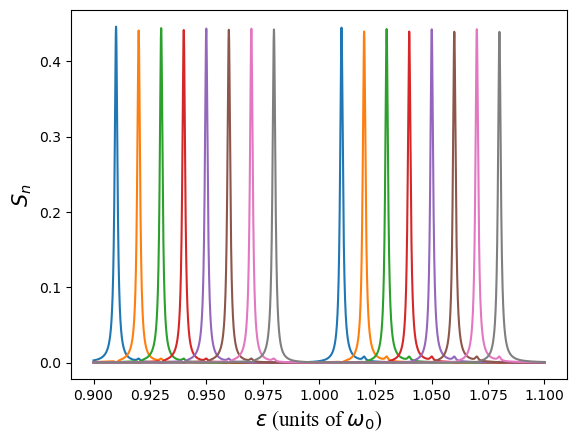

In [32]:
for k in range(N):
    plt.plot(ϵ, Sn[k])
plt.xlabel(r"$\varepsilon$ (units of $\omega_0$)", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$S_n$", fontdict={"family": "Times New Roman", "size": 15})
plt.show()

#### Figure 3.(b)
$$\omega_n^c=2\omega_0,\omega_n^a=[0.96+0.01(n-1)]\omega_0\ (n=1,2,\ldots,N)$$

In [46]:
# system parameters
N = 8
ω0 = 1

γn_c = 0
γn_a = 0
Ω=0.05*ω0
Γ = 0.001*ω0
d = 1.25 * 2 * np.pi


ϵ = np.linspace(0.95, 1.04, 200000)

locs = list(range(N))
ωn_c = 2*ω0
ωn_a = [0.96+0.01*(n-1) for n in range(1, N+1)]

In [47]:
# construct Input and Output channels
mode_br = [[np.sqrt(Γ)*np.exp(-1j*locs[k]*d), ("a", k)] for k in range(N)]
mode_cN = [[np.sqrt(Γ), ("a", k)] for k in range(N)]


Input = qcs.Input_channel("br", mode_br, ϵ)
Output = [qcs.Output_channel("c_%s"%k, mode_cN[k]) for k in range(N)]
# construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
Heff = []
for k in range(N):
    Heff.append([ωn_c-1j*Γ/2-1j*γn_c, ("ad", k), ("a", k)])
    Heff.append([ωn_a[k]-1j*γn_a, ("sp", k), ("sm", k)])
    Heff.append([Ω, ("ad", k), ("sm", k)])
    Heff.append([Ω, ("a", k), ("sp", k)])
    for l in range(N):
        Heff.append([-1j*Γ*np.exp(1j*d*np.abs(locs[k]-locs[l])), ("ad", k), ("a", l)])
        
result = qcs(Heff, Input, Output)

Sn = [result.calculate_quantity("c_%s"%k) for k in range(N)]

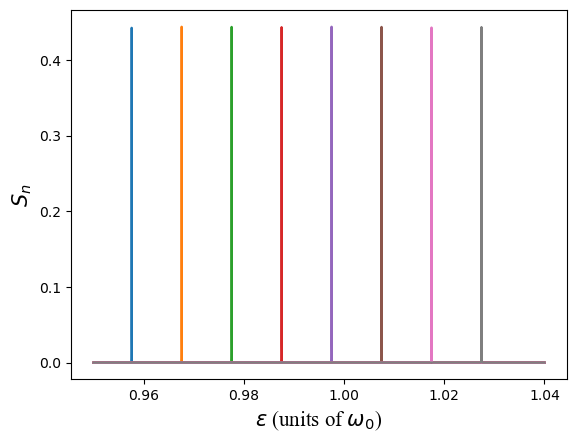

In [48]:
for k in range(N):
    plt.plot(ϵ, Sn[k])
plt.xlabel(r"$\varepsilon$ (units of $\omega_0$)", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$S_n$", fontdict={"family": "Times New Roman", "size": 15})
plt.show()

#### Figure 3.(c)
$$\omega_n^c=2\omega_0,\omega_n^a=[1.03-0.01(n-1)]\omega_0\ (n=1,2,\ldots,N)$$

In [49]:
# system parameters
N = 8
ω0 = 1

γn_c = 0
γn_a = 0
Ω=0.05*ω0
Γ = 0.001*ω0
d = 1.25 * 2 * np.pi


ϵ = np.linspace(0.95, 1.04, 200000)

locs = list(range(N))
ωn_c = 2*ω0
ωn_a = [1.03-0.01*(n-1) for n in range(1, N+1)]

In [50]:
# construct Input and Output channels
mode_br = [[np.sqrt(Γ)*np.exp(-1j*locs[k]*d), ("a", k)] for k in range(N)]
mode_cN = [[np.sqrt(Γ), ("a", k)] for k in range(N)]


Input = qcs.Input_channel("br", mode_br, ϵ)
Output = [qcs.Output_channel("c_%s"%k, mode_cN[k]) for k in range(N)]
# construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
Heff = []
for k in range(N):
    Heff.append([ωn_c-1j*Γ/2-1j*γn_c, ("ad", k), ("a", k)])
    Heff.append([ωn_a[k]-1j*γn_a, ("sp", k), ("sm", k)])
    Heff.append([Ω, ("ad", k), ("sm", k)])
    Heff.append([Ω, ("a", k), ("sp", k)])
    for l in range(N):
        Heff.append([-1j*Γ*np.exp(1j*d*np.abs(locs[k]-locs[l])), ("ad", k), ("a", l)])
        
result = qcs(Heff, Input, Output)

Sn = [result.calculate_quantity("c_%s"%k) for k in range(N)]

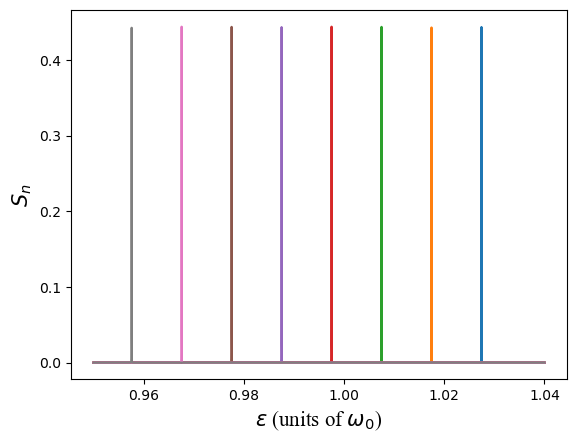

In [51]:
for k in range(N):
    plt.plot(ϵ, Sn[k])
plt.xlabel(r"$\varepsilon$ (units of $\omega_0$)", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$S_n$", fontdict={"family": "Times New Roman", "size": 15})
plt.show()

### Figure 5
$$\Omega=0.05\omega_0, d=1.25,\Gamma=0.001\omega_0,,\omega_n^c=2\omega_0,\omega_n^a=[0.96+0.01(n-1)],N=8$$

#### Figure 5.(a)
$$\gamma_a=10^{-6}\omega_0,\gamma_c=0$$

In [59]:
# system parameters
N = 8
ω0 = 1

γn_c = 0
γn_a = 1e-6*ω0
Ω=0.05*ω0
Γ = 0.001*ω0
d = 1.25 * 2 * np.pi


ϵ = np.linspace(0.95, 1.04, 200000)

locs = list(range(N))
ωn_c = 2*ω0
ωn_a = [0.96+0.01*(n-1) for n in range(1, N+1)]

In [60]:
# construct Input and Output channels
mode_br = [[np.sqrt(Γ)*np.exp(-1j*locs[k]*d), ("a", k)] for k in range(N)]
mode_cN = [[np.sqrt(Γ), ("a", k)] for k in range(N)]


Input = qcs.Input_channel("br", mode_br, ϵ)
Output = [qcs.Output_channel("c_%s"%k, mode_cN[k]) for k in range(N)]
# construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
Heff = []
for k in range(N):
    Heff.append([ωn_c-1j*Γ/2-1j*γn_c, ("ad", k), ("a", k)])
    Heff.append([ωn_a[k]-1j*γn_a, ("sp", k), ("sm", k)])
    Heff.append([Ω, ("ad", k), ("sm", k)])
    Heff.append([Ω, ("a", k), ("sp", k)])
    for l in range(N):
        Heff.append([-1j*Γ*np.exp(1j*d*np.abs(locs[k]-locs[l])), ("ad", k), ("a", l)])
        
result = qcs(Heff, Input, Output)

Sn = [result.calculate_quantity("c_%s"%k) for k in range(N)]

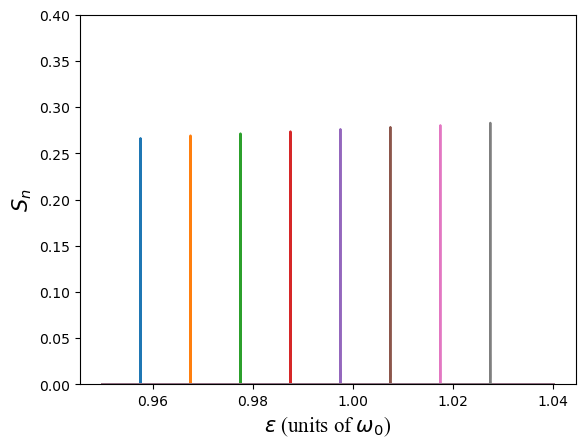

In [61]:
for k in range(N):
    plt.plot(ϵ, Sn[k])
plt.xlabel(r"$\varepsilon$ (units of $\omega_0$)", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$S_n$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylim([0,0.4])
plt.show()

#### Figure 5.(b)
$$\gamma_a=10^{-5}\omega_0,\gamma_c=0$$

In [62]:
# system parameters
N = 8
ω0 = 1

γn_c = 0
γn_a = 1e-5*ω0
Ω=0.05*ω0
Γ = 0.001*ω0
d = 1.25 * 2 * np.pi


ϵ = np.linspace(0.95, 1.04, 200000)

locs = list(range(N))
ωn_c = 2*ω0
ωn_a = [0.96+0.01*(n-1) for n in range(1, N+1)]

In [63]:
# construct Input and Output channels
mode_br = [[np.sqrt(Γ)*np.exp(-1j*locs[k]*d), ("a", k)] for k in range(N)]
mode_cN = [[np.sqrt(Γ), ("a", k)] for k in range(N)]


Input = qcs.Input_channel("br", mode_br, ϵ)
Output = [qcs.Output_channel("c_%s"%k, mode_cN[k]) for k in range(N)]
# construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
Heff = []
for k in range(N):
    Heff.append([ωn_c-1j*Γ/2-1j*γn_c, ("ad", k), ("a", k)])
    Heff.append([ωn_a[k]-1j*γn_a, ("sp", k), ("sm", k)])
    Heff.append([Ω, ("ad", k), ("sm", k)])
    Heff.append([Ω, ("a", k), ("sp", k)])
    for l in range(N):
        Heff.append([-1j*Γ*np.exp(1j*d*np.abs(locs[k]-locs[l])), ("ad", k), ("a", l)])
        
result = qcs(Heff, Input, Output)

Sn = [result.calculate_quantity("c_%s"%k) for k in range(N)]

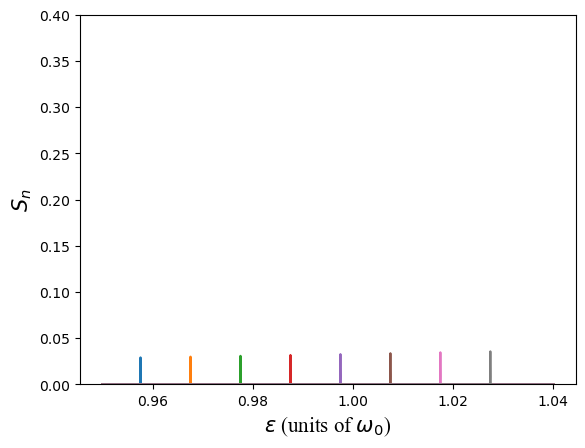

In [64]:
for k in range(N):
    plt.plot(ϵ, Sn[k])
plt.xlabel(r"$\varepsilon$ (units of $\omega_0$)", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$S_n$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylim([0,0.4])
plt.show()

#### Figure 5.(c)
$$\gamma_a=0,\gamma_c=10^{-5}\omega_0$$

In [65]:
# system parameters
N = 8
ω0 = 1

γn_c = 1e-5*ω0
γn_a = 0
Ω=0.05*ω0
Γ = 0.001*ω0
d = 1.25 * 2 * np.pi


ϵ = np.linspace(0.95, 1.04, 200000)

locs = list(range(N))
ωn_c = 2*ω0
ωn_a = [0.96+0.01*(n-1) for n in range(1, N+1)]

In [66]:
# construct Input and Output channels
mode_br = [[np.sqrt(Γ)*np.exp(-1j*locs[k]*d), ("a", k)] for k in range(N)]
mode_cN = [[np.sqrt(Γ), ("a", k)] for k in range(N)]


Input = qcs.Input_channel("br", mode_br, ϵ)
Output = [qcs.Output_channel("c_%s"%k, mode_cN[k]) for k in range(N)]
# construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
Heff = []
for k in range(N):
    Heff.append([ωn_c-1j*Γ/2-1j*γn_c, ("ad", k), ("a", k)])
    Heff.append([ωn_a[k]-1j*γn_a, ("sp", k), ("sm", k)])
    Heff.append([Ω, ("ad", k), ("sm", k)])
    Heff.append([Ω, ("a", k), ("sp", k)])
    for l in range(N):
        Heff.append([-1j*Γ*np.exp(1j*d*np.abs(locs[k]-locs[l])), ("ad", k), ("a", l)])
        
result = qcs(Heff, Input, Output)

Sn = [result.calculate_quantity("c_%s"%k) for k in range(N)]

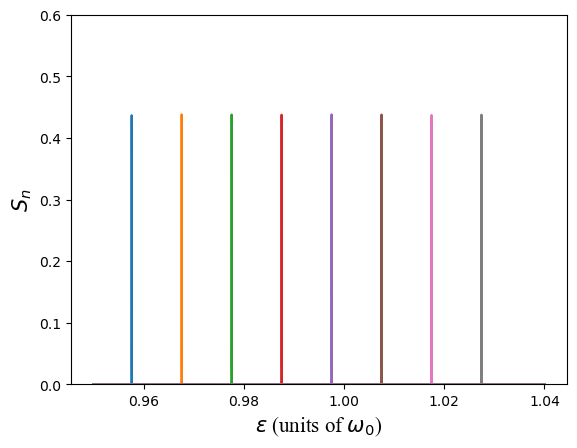

In [67]:
for k in range(N):
    plt.plot(ϵ, Sn[k])
plt.xlabel(r"$\varepsilon$ (units of $\omega_0$)", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$S_n$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylim([0,0.6])
plt.show()

#### Figure 5.(d)
$$\gamma_a=0,\gamma_c=10^{-4}\omega_0$$

In [68]:
# system parameters
N = 8
ω0 = 1

γn_c = 1e-4*ω0
γn_a = 0
Ω=0.05*ω0
Γ = 0.001*ω0
d = 1.25 * 2 * np.pi


ϵ = np.linspace(0.95, 1.04, 200000)

locs = list(range(N))
ωn_c = 2*ω0
ωn_a = [0.96+0.01*(n-1) for n in range(1, N+1)]

In [69]:
# construct Input and Output channels
mode_br = [[np.sqrt(Γ)*np.exp(-1j*locs[k]*d), ("a", k)] for k in range(N)]
mode_cN = [[np.sqrt(Γ), ("a", k)] for k in range(N)]


Input = qcs.Input_channel("br", mode_br, ϵ)
Output = [qcs.Output_channel("c_%s"%k, mode_cN[k]) for k in range(N)]
# construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
Heff = []
for k in range(N):
    Heff.append([ωn_c-1j*Γ/2-1j*γn_c, ("ad", k), ("a", k)])
    Heff.append([ωn_a[k]-1j*γn_a, ("sp", k), ("sm", k)])
    Heff.append([Ω, ("ad", k), ("sm", k)])
    Heff.append([Ω, ("a", k), ("sp", k)])
    for l in range(N):
        Heff.append([-1j*Γ*np.exp(1j*d*np.abs(locs[k]-locs[l])), ("ad", k), ("a", l)])
        
result = qcs(Heff, Input, Output)

Sn = [result.calculate_quantity("c_%s"%k) for k in range(N)]

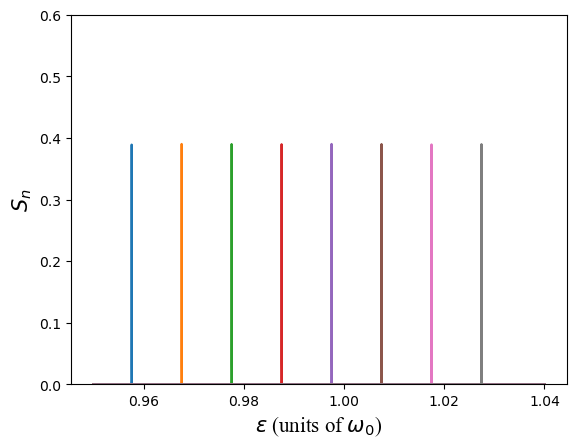

In [70]:
for k in range(N):
    plt.plot(ϵ, Sn[k])
plt.xlabel(r"$\varepsilon$ (units of $\omega_0$)", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$S_n$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylim([0,0.6])
plt.show()

### Figure 6.Influence of interferential levels in atoms

$$\omega_n^i=\omega_n^c=2\omega_0,d=1.25,\Gamma=0.001\omega_0,\Omega=0.05\omega_0$$

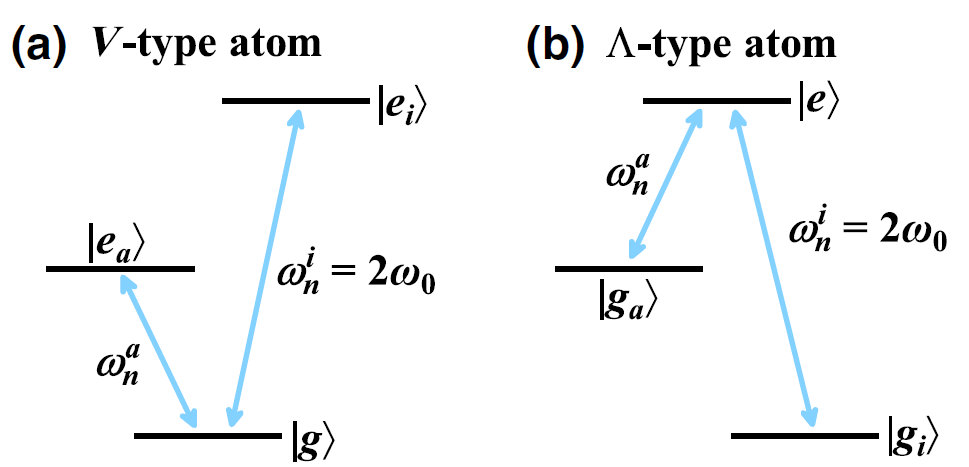

#### Figure 6.(c)
$$\omega_n^a=[0.96+0.01(n-1)]$$

In [71]:
# system parameters
N = 8
ω0 = 1

γn_c = 0
γn_a = 0
Ω=0.05*ω0
Γ = 0.001*ω0
d = 1.25 * 2 * np.pi


ϵ = np.linspace(0.94, 1.04, 200000)

locs = list(range(N))
ωn_c = 2*ω0
ωn_i = 2*ω0
ωn_a = [0.96+0.01*(n-1) for n in range(1, N+1)]

In [72]:
# construct Input and Output channels
mode_br = [[np.sqrt(Γ)*np.exp(-1j*locs[k]*d), ("a", k)] for k in range(N)]
mode_cN = [[np.sqrt(Γ), ("a", k)] for k in range(N)]


Input = qcs.Input_channel("br", mode_br, ϵ)
Output = [qcs.Output_channel("c_%s"%k, mode_cN[k]) for k in range(N)]
# construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
Heff = []
for k in range(N):
    Heff.append([ωn_c-1j*Γ/2-1j*γn_c, ("ad", k), ("a", k)])
    Heff.append([ωn_a[k]-1j*γn_a, ("sp", 2*k), ("sm", 2*k)])
    Heff.append([ωn_i-1j*γn_a, ("sp", 2*k+1), ("sm", 2*k+1)])
    
    Heff.append([Ω, ("ad", k), ("sm", 2*k)])
    Heff.append([Ω, ("a", k), ("sp", 2*k)])
    
    Heff.append([Ω, ("ad", k), ("sm", 2*k+1)])
    Heff.append([Ω, ("a", k), ("sp", 2*k+1)])
    for l in range(N):
        Heff.append([-1j*Γ*np.exp(1j*d*np.abs(locs[k]-locs[l])), ("ad", k), ("a", l)])
        
result = qcs(Heff, Input, Output)

Sn = [result.calculate_quantity("c_%s"%k) for k in range(N)]

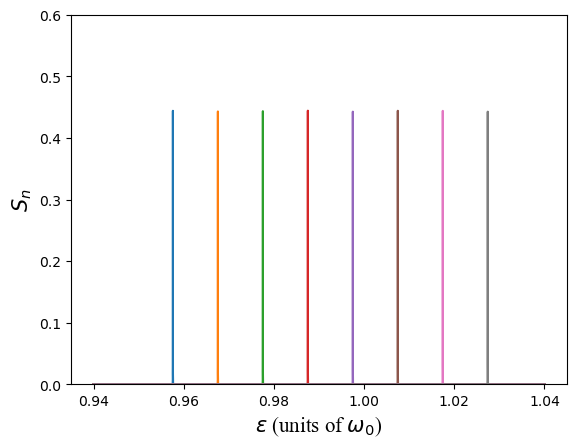

In [73]:
for k in range(N):
    plt.plot(ϵ, Sn[k])
plt.xlabel(r"$\varepsilon$ (units of $\omega_0$)", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$S_n$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylim([0,0.6])
plt.show()

#### Figure 6.(d)
$$\omega_n^a=[1.03-0.01(n-1)]$$

It is just a rotation of symbols, like $e\to g_i,g_i\to g_a,g_a\to e$, and the result must be unchanged.

### Figure 7.(c)
$$\omega_n^a=[0.96+0.01(n-1)],\omega_n^c=2\omega_0,d=1.25,\Gamma=0.001\omega_0,\gamma_n^a=\gamma_n^c=0,\Omega=0.05\omega_0,N=8,\delta=\delta_+$$